# Classifying movie reviews: A binary classification example
#### Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".



In [1]:
#imports
from keras.datasets import imdb

Using TensorFlow backend.


In [18]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
                                                      
                                                       

In [3]:
x_train.shape

(25000,)

In [4]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
x_train

array([ list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228

In [6]:
y_train.shape

(25000,)

In [7]:
y_train[0]

1

In [8]:
x_test.shape

(25000,)

In [9]:
y_test.shape

(25000,)

## Data preprocessing

we cant find list of integers in a neural network. we have to turn it into a tensor of shape=(samples,word_indices).
## 1. One hot encoding

### Encoding list of integers into binary matrix

In [10]:
from numpy import array
import numpy as np
from numpy import argmax
from keras.utils import to_categorical

In [1]:

def vectorize_sequence(sequences,dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [12]:
x_train= vectorize_sequence(x_train)
x_train

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.]])

** define example
data = [1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
data = array(data)
print(data)
*** one hot encode
encoded = to_categorical(data)
print(encoded)

In [13]:
x_train.shape

(25000, 10000)

In [14]:
x_test.shape

(25000,)

In [15]:
np.array(x_test[0]).shape

(72,)

In [16]:
x_test= vectorize_sequence(x_test)
x_test

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.]])

In [17]:
x_test.shape

(25000, 10000)

### Method 2- Sequence Padding
Obviously, movie reviews are not expected to have the same text length (number of words). However, neural networks are expecting a fixed size of input vector. We will therefore have to either truncate long reviews or pad short reviews with special word paddings (like with a null word such as "<PAD>" that does not have any meaning, and can be encoded by 0). We use the Keras sequence.pad_sequences utility for this task.

In [26]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=10000)
x_test = sequence.pad_sequences(x_test, maxlen=10000)
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)

X_train shape: (25000, 10000)
X_test shape: (25000, 10000)


### Label Preprocessing

In [29]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [30]:
y_train.dtype

dtype('int64')

In [31]:
y_train= np.array(y_train).astype('float32')

In [32]:
y_train.dtype

dtype('float32')

In [33]:
y_test= np.array(y_test).astype('float32')

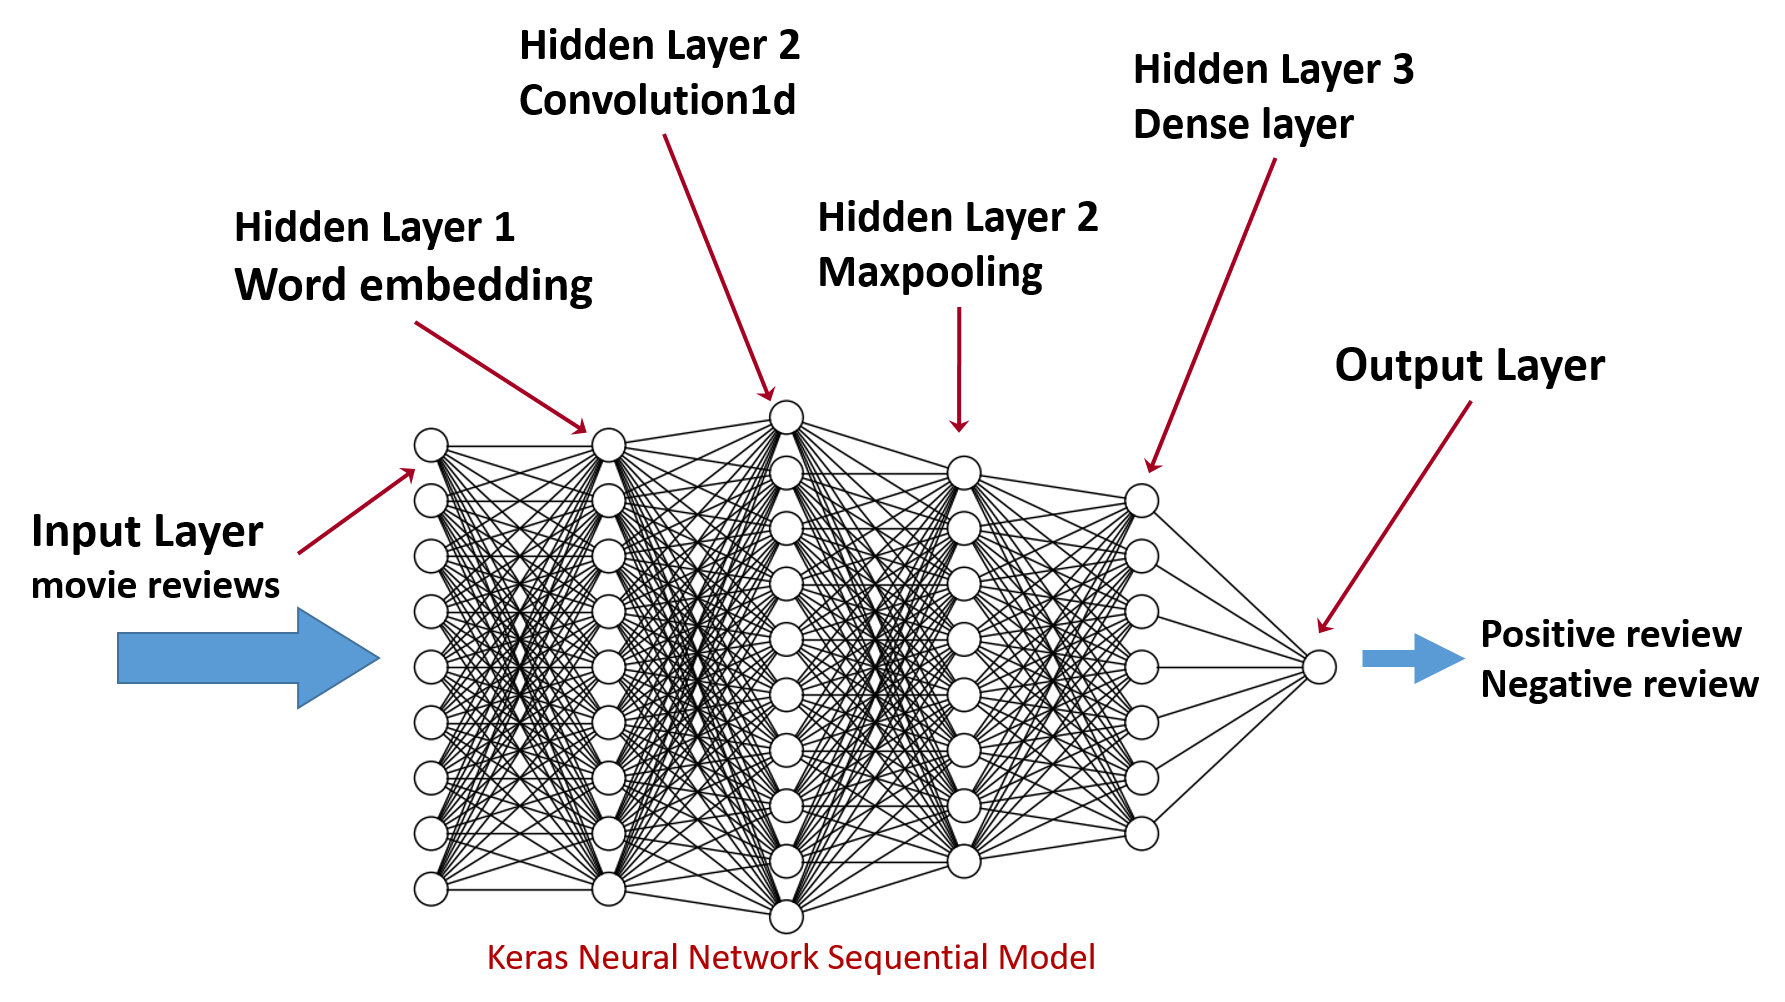

In [23]:
from IPython.display import Image
Image("cnn4.png")

In [36]:
from keras import models, layers

In [37]:
model= models.Sequential()

In [38]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

#configuring optimizers
## from keras import optimizers, losses,metrics
## model.compile(optimizer= optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.accuracy])

## Create cross hold out validation set

In [45]:
X_val=X_train[:10000]
New_X_train=X_train[10000:]

In [46]:
y_val=y_train[:10000]
new_y_train=y_train[10000:]

## Train

In [49]:
history= model.fit(New_X_train, new_y_train, epochs=20, batch_size=512,validation_data=(X_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s - loss: 0.6949 - acc: 0.5131 - val_loss: 0.7096 - val_acc: 0.5004
Epoch 2/20
15000/15000 [==============================] - 3s - loss: 0.6938 - acc: 0.5153 - val_loss: 0.7031 - val_acc: 0.4968
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.6936 - acc: 0.5165 - val_loss: 0.7061 - val_acc: 0.4973
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.6903 - acc: 0.5223 - val_loss: 0.7134 - val_acc: 0.4994
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.6956 - acc: 0.5245 - val_loss: 0.7054 - val_acc: 0.4972
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.6881 - acc: 0.5271 - val_loss: 0.7160 - val_acc: 0.5002
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.6856 - acc: 0.5260 - val_loss: 0.7144 - val_acc: 0.5002
Epoch 8/20
15000/15000 [==============================] - 2s 

In [51]:
history.history

{'acc': [0.51306666661898293,
  0.51533333341280618,
  0.51653333304723104,
  0.52233333344459532,
  0.52453333307902017,
  0.52713333330154422,
  0.5259999998728434,
  0.5299999998569489,
  0.53333333339691158,
  0.5353333335240682,
  0.53773333314259852,
  0.53913333336512248,
  0.54026666644414267,
  0.54213333336512248,
  0.54226666663487755,
  0.54399999984105429,
  0.54526666660308842,
  0.545666666952769,
  0.54686666685740148,
  0.54899999971389768],
 'loss': [0.69485521396001182,
  0.69376050488154095,
  0.69364009752273559,
  0.69029550247192384,
  0.69556187311808271,
  0.68808114938735965,
  0.68564545259475707,
  0.68536527900695798,
  0.68040751953125,
  0.67987863505681356,
  0.68051980902353926,
  0.67795634441375729,
  0.67834372676213583,
  0.67657894751230874,
  0.6732948839823405,
  0.67249754336675005,
  0.67025432936350504,
  0.6734192804972331,
  0.67094867296218874,
  0.66939275385538732],
 'val_acc': [0.50040000033378607,
  0.49680000014305115,
  0.497299999856

### Plotting training and validation loss

In [58]:
import matplotlib.pyplot as plt

In [55]:
loss_value= history.history['loss']
val_loss_value= history.history['val_loss']
acc = history.history['acc']


In [56]:
epochs= range(1,len(acc)+1)

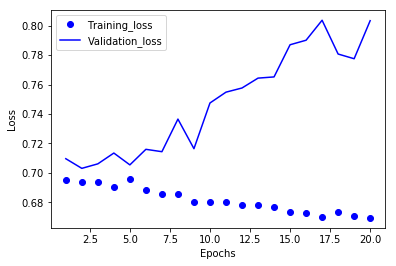

In [66]:
#Plot train and validation loss
plt.plot(epochs,loss_value,'bo',label='Training_loss')
plt.plot(epochs,val_loss_value,'b',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

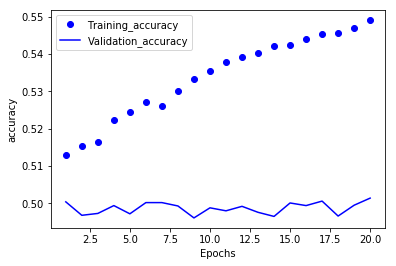

In [65]:
#Plot train and validation accuracy
accuracy_value= history.history['acc']
val_accuracy_value= history.history['val_acc']
plt.plot(epochs,accuracy_value,'bo',label='Training_accuracy')
plt.plot(epochs,val_accuracy_value,'b',label='Validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


** Ideally the training loss should decrease with every epoch and training accuracy should increase. Same thing should happen with validation set. However here validation set doesnt behave in this way,this is causing Overfitting.
At epoch 4, the validation loss just shoots up and validation accuracy as well( This can be prevented by early stopping in Keras(avoid overfitting)

In [68]:
## Retraining the model from sctratch on 4 epochs
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results
#loss,accuracy

Epoch 1/4
25000/25000 [==============================] - 4s - loss: 7.3020 - acc: 0.5070     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 1.4962 - acc: 0.5048     
Epoch 3/4
25000/25000 [==============================] - 3s - loss: 0.7469 - acc: 0.4996     
Epoch 4/4
24832/25000 [============================>.] - ETA: 0s

[0.69846207557678219, 0.50471999999999995]

In [70]:
#predict on new data
model.predict(x_test)

array([[ 0.49786726],
       [ 0.53439671],
       [ 0.49363035],
       ..., 
       [ 0.49363035],
       [ 0.50691003],
       [ 0.49363035]], dtype=float32)

## Further experiment

1. Try 3 hidden layers
2. Try changing layers - 32 units, 64 units and so on
3. Try using mse instead of binary_crossentropy
4. Try tanh instead of relu